# Univariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/skaZPhb.png" width="350px"/></td>
<td><img src="https://i.imgur.com/gaNttYd.png" width="350px"/></td>
<td><img src="https://i.imgur.com/pampioh.png"/></td>
<td><img src="https://i.imgur.com/OSbuszd.png"/></td>

<!--<td><img src="https://i.imgur.com/ydaMhT1.png" width="350px"/></td>
<td><img src="https://i.imgur.com/WLAqDSV.png" width="350px"/></td>
<td><img src="https://i.imgur.com/Tj2y9gH.png"/></td>
<td><img src="https://i.imgur.com/X0qXLCu.png"/></td>-->
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Bar Chat</td>
<td style="font-weight:bold; font-size:16px;">Line Chart</td>
<td style="font-weight:bold; font-size:16px;">Area Chart</td>
<td style="font-weight:bold; font-size:16px;">Histogram</td>
</tr>
<tr>
<td>df.plot.bar()</td>
<td>df.plot.line()</td>
<td>df.plot.area()</td>
<td>df.plot.hist()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>	Good for ordinal categorical and interval data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for interval data.</td>
</tr>
</table>

----

pandas库是Python数据分析的核心库：使整个生态系统粘在一起的“杀手级功能”。 但是，它不仅可以加载和转换您的数据：它还可以将其可视化！ 事实上，易于使用和富有表现力的熊猫绘图API是熊猫流行的重要组成部分。

在本节中，我们将学习基本的大熊猫绘图设施，从最简单的可视化类型开始：单变量或“单变量”可视化。 这包括条形图和折线图等基本工具。 通过这些，我们将了解大熊猫绘制库结构，并花一些时间检查数据类型。

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./input/winemag-data_first150k.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Bar charts and categorical data（条形图和分类数据）

条形图可以说是最简单的数据可视化。 他们将类别映射到数字：早餐（一类）消费的鸡蛋数量，例如，吃早餐的美国人; 或者，就我们而言，世界葡萄酒产区（类别）与其生产的葡萄酒标签数量（数量）：

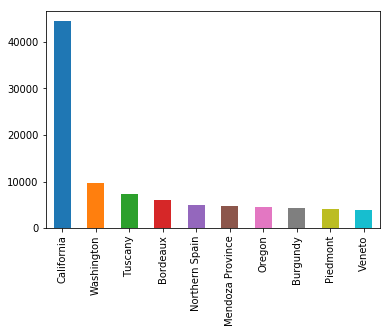

In [10]:
df.province.value_counts().head(10).plot.bar()

这个情节告诉我们什么？ 它说加州生产的葡萄酒远远超过世界上任何其他省份！ 我们可能会问，加州葡萄酒总量的百分之几是多少？ 这个条形图告诉我们绝对数字，但知道相对比例更有用。 没问题：

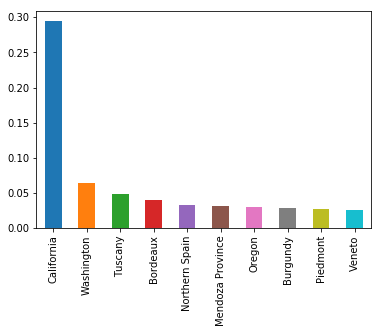

In [11]:
(df.province.value_counts()/len(df)).head(10).plot.bar()

加州生产葡萄酒杂志评选的葡萄酒几乎三分之一！

条形图非常灵活：高度可以代表任何东西，只要它是一个数字。 每个栏都可以代表任何东西，只要它是一个类别。

在这种情况下，类别是名义类别：“纯”类别，对订购没有多大意义。 标称分类变量包括国家，邮政编码，奶酪类型和月球登陆器等。 另一类是有序的类别：比较有意义的事情，如地震震级，有一定数量公寓的住宅区，以及当地熟食店的薯条大小。

或者，在我们的案例中，Wine Magazine分配的某个评分的评论数量：

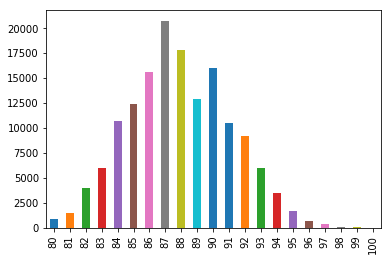

In [6]:
df['points'].value_counts().sort_index().plot.bar()

正如你所看到的，每个年份的总分都在80到100之间。 而且，如果我们相信葡萄酒杂志是一个品味良好的仲裁者，那么92就会比91更有意义地“更好”。

## Line charts (折线图)

葡萄酒评论记分卡有20个不同的独特值可供填写，我们的条形图几乎不够。 如果杂志评价0-100的话，我们该怎么办？ 我们有100个不同的类别; 太多了，不适合每个人的酒吧！

在这种情况下，我们可以使用折线图代替条形图：

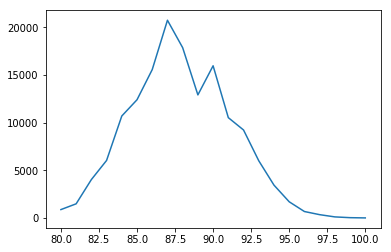

In [5]:
df.points.value_counts().sort_index().plot.line()

折线图可以传递任意数量的单个值，使其成为具有许多唯一值或类别的分布的首选工具。

但是，折线图有一个重要的缺点：与条形图不同，它们不适合名义分类数据。 虽然条形图区分了点线图的每个“类型”，但它们将它们组合在一起。 因此，折线图断言水平轴上的值的顺序，并且对于某些数据，顺序将没有意义。 毕竟，从加利福尼亚到华盛顿到托斯卡纳的“下降”并不意味着什么！

折线图也使得区分单个值变得更加困难。

通常，如果您的数据可以放入条形图中，只需使用条形图！

我们来判断练习下，下面几个问题应该用条形图还是折线图呢：
1.考虑到有5种不同的口味，通过口味购买的冰淇淋桶的数量。
2.从密歇根州的美国汽车制造商处购买的平均汽车数量。
3.大学教师给予学生的考试成绩，0-100分。
4.位于曼哈顿下城街道名称的街道上的餐馆数量。

考虑下对于哪一个条形图会更好？ 用线路哪个更好？

这里给出答案和解释：
1. 这是一个简单的名义分类变量。五个条形图很容易放入显示屏中，因此条形图可以做到！

2. 这个例子类似：名义分类变量。可能有五个以上的美国汽车制造商，所以图表会更加拥挤，但条形图仍然会这样做。

3. 这是一个序数分类变量。我们有很多介于0和100之间的潜在值，因此条形图将没有足够的空间。折线图更好。

4.这个要困难得多。城市街道显然是普通的分类变量，因此我们应该*使用条形图;但那里有很多街道！我们不可能将它们全部放入显示器中。

有时，你的数据会有太多的分数来“整齐地”做一些事情，这没关系。如果按值计数组织数据并在其上绘制折线图，​​您将学习有关*百分位数*的有价值信息：例如，第90百分位数的街道有20家餐馆，或者第50名的街道只有6家。基本上是一种聚合形式：我们把街道变成百分位数！

经验教训：您对数据的*解释*比您使用的工具更重要。

## Area charts(面积图)

面积图只是折线图，但底部有阴影。就是这样！

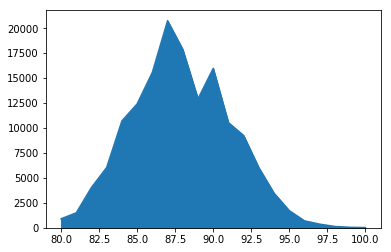

In [6]:
df.points.value_counts().sort_index().plot.area()

当仅绘制一个变量时，面积图和折线图之间的差异主要是视觉的。 在这种情况下，它们可以互换使用

## Interval data(区间数据)

让我们继续看看另一种类型的数据，一个区间变量。

区间变量的例子是飓风中的风速，混凝土中的剪切强度和太阳的温度。区间变量超出了序数分类变量：它具有有意义的顺序，在某种意义上我们可以量化两个条目之间的差异本身就是区间变量。

例如，如果我说这个样本的水是-20摄氏度，而另一个样本是120摄氏度，那么我可以量化它们之间的差异：140度“值”的热量，或者诸如此类的许多焦耳的能量。

有时差异可能是定性的。至少，能够如此清楚地陈述某些东西感觉比说“测量”要多得多，比如说，你会买这种酒，而不是那种，因为这个在一些口味测试中得了92分而且只有一个得到了更确切地说，任何具有无限多个可能值的变量肯定是区间变量（为什么不是120.1度？120.001？120.0000000001？等等）。

折线图适用于间隔数据。条形图没有 - 除非你的测量能力非常有限，间隔数据自然会有很大变化。

让我们将一个新工具直方图应用到我们的数据集中的区间变量，价格（我们将价格降低到200美元一瓶;更多关于为什么很快）。

## Histograms（直方图）

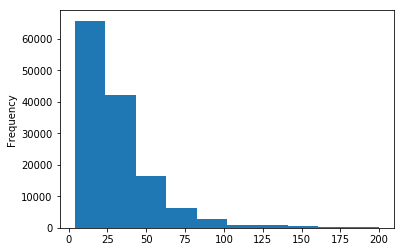

In [7]:
df[df.price<=200]['price'].sort_index().plot.hist()

直方图看起来很简单，就像一个条形图。 它基本上是！ 实际上，直方图是一种特殊的条形图，它将您的数据拆分为均匀间隔，并显示每个条形区域中有多少行。 唯一的分析差异是，代替每个条形代表单个值，它代表一系列值。

然而，直方图有一个主要缺点（之前我们200美元警告的原因）。 因为它们将空间分成均匀间隔，所以它们不能很好地处理偏斜的数据：

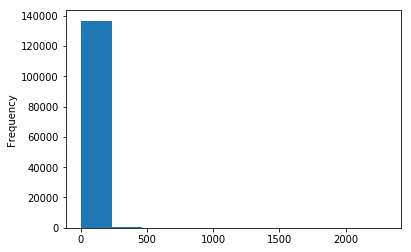

In [7]:
df['price'].plot.hist()

这是我之前排除> 200美元瓶子的真正原因; 其中一些葡萄酒真的很贵！ 图表将“增长”以包含它们，从而损害所显示的其余数据。

In [9]:
df[df['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


有许多方法可以处理偏斜的数据问题; 这些超出了本教程的范围。 最简单的就是做我做的事情：在明智的水平上切断事情。

这种现象在统计学上已知为倾斜，并且它是区间变量中相当常见的现象。

直方图最适用于没有偏斜的区间变量。 对于像点这样的序数分类变量，它们也能很好地工作：

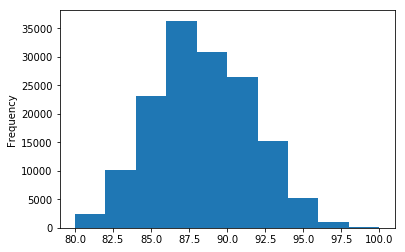

In [10]:
df['points'].plot.hist()

---

## Exercises

我们再做一次练习吧。 最佳图表类型是什么：

1.根据苹果的类型（格兰尼史密斯，富士等）在果园采摘的苹果量。
2.在一个赛季的所有篮球比赛中赢得的积分数。
3.芝加哥的公寓楼数量由个别单位数量决定。

示例编号1是名义上的分类示例，因此是相当直接的条形图目标。

示例2是大的名义分类变量。 一个篮球比赛队可以得到50到150分，对于条形图来说太多了; 折线图是一个很好的方法。 直方图也可以工作。

示例3是区间变量：单个建筑物可以具有1到1000或更多公寓单元之间的任何地方。 折线图可以工作，但直方图可能会更好！ 请注意，这种分布会有很多偏差（只有极少数非常非常大的公寓楼）。

现在轮到你了！对于这些练习，我们将使用Pokemon数据集（因为什么比葡萄酒和口袋妖怪更好？）。

In [12]:
pd.set_option('max_columns', None)
pokemon = pd.read_csv("./input/pokemon.csv")
pokemon.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


口袋妖怪的频率类型：

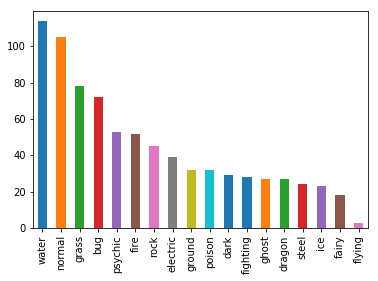

In [13]:
pokemon['type1'].value_counts().plot.bar()

Pokemon的频率按HP统计总数：

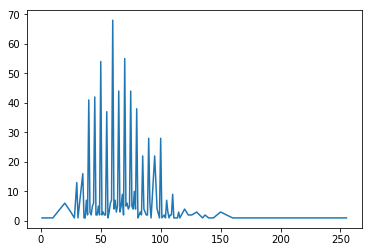

In [14]:
pokemon['hp'].value_counts().sort_index().plot.line()

口袋妖怪按重量计的频率：

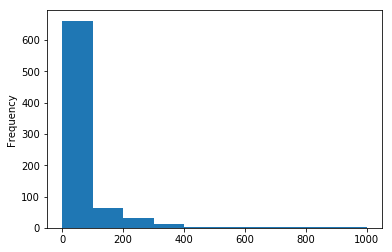

In [15]:
pokemon['weight_kg'].plot.hist()

---

## Conclusion

在本教程的这一部分中，我们了解了一些不同类型的数据，并查看了pandas为绘制它们提供的一些内置工具。